In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import joblib
print("All Libraries Imported")

All Libraries Imported


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/liver/liver.csv')
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:

#data.info()
data.isnull().sum() #getting missing values sum 

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

### DATA PREPROCESSING 

In [5]:

#Filling missing values with 0 
data['Albumin_and_Globulin_Ratio'].fillna(value=0, inplace=True)
#We can see there are 4 missing values we had filled with 0  so we will replace it with NaN along with 0 inother rows which is not acceptable
non_acceptable_zero = ['Total_Bilirubin','Direct_Bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']
for col in non_acceptable_zero:
    data[col].replace(0, np.nan, inplace=True)

In [6]:
#adding mean in place of NaN
for col in non_acceptable_zero:
    data[col].replace(np.nan, data[col].mean(), inplace=True) 

In [7]:
data.loc[data['Gender'] == 'Male', 'Gender'] = 1 #replacing Male with 1
data.loc[data['Gender'] == 'Female', 'Gender'] = 0 #replacing Female with 0
data['Gender'].value_counts()

1    441
0    142
Name: Gender, dtype: int64

In [8]:
data['Dataset'].value_counts()

1    416
0    167
Name: Dataset, dtype: int64

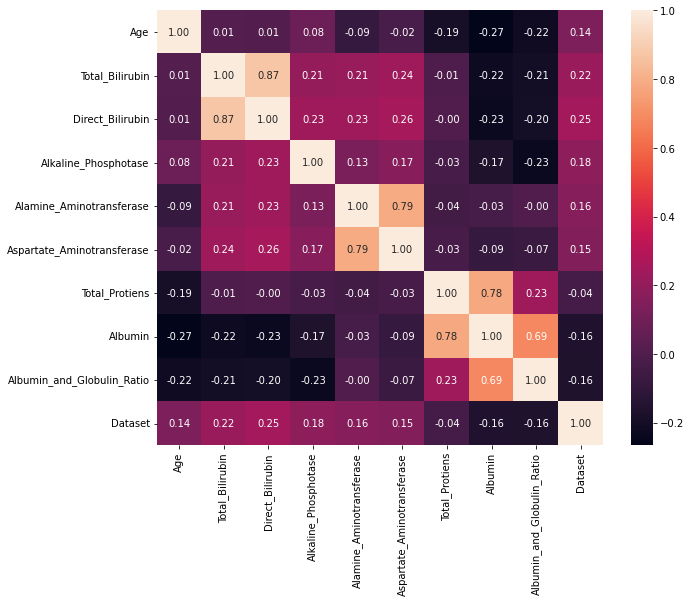

In [9]:
plt.figure(figsize=(10, 8))

sns.heatmap(data.corr(), annot = True, fmt = '0.2f');

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  583 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [11]:
data.groupby('Dataset').mean()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,
0,41.239521,1.142515,0.396407,219.754491,33.652695,40.688623,6.543114,3.344311,1.028588
1,46.153846,4.164423,1.923558,319.007212,99.605769,137.699519,6.459135,3.060577,0.914337


In [12]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [13]:
!pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 3.8 MB/s 


In [14]:
import pandas as pd 
import sweetviz

In [15]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [16]:
my_report = sweetviz.analyze([data, "Train"],target_feat='Dataset')

                                             |          | [  0%]   00:00 -> (? left)

In [17]:
my_report.show_html('Report_Liver.html')

Report Report_Liver.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#SPLITTING TEST AND TRAIN DATA

In [18]:

X = data.drop(columns='Dataset', axis=1)
Y = data['Dataset']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, stratify=Y, random_state=5)

#GradientBoostingClassifier

In [19]:

from sklearn.ensemble import GradientBoostingClassifier
GBClassifierModel = GradientBoostingClassifier()
GBClassifierModel.fit(X_train, Y_train)

GradientBoostingClassifier()

In [20]:
X_train_predict = GBClassifierModel.predict(X_train)
train_accuracy = accuracy_score( np.round(abs(X_train_predict)), Y_train )

X_test_predict = GBClassifierModel.predict(X_test)
test_accuracy = accuracy_score(np.round(abs(X_test_predict)) ,Y_test)



In [21]:
print('Training data Accuracy: ', train_accuracy*100 ,'%')
print('Test data Accuracy: ', test_accuracy*100 ,'%')

Training data Accuracy:  96.56084656084656 %
Test data Accuracy:  71.70731707317073 %


#GradientBoostingRegressor

In [22]:

from sklearn.ensemble import GradientBoostingRegressor
GBRegressorModel = GradientBoostingRegressor(random_state=5)
GBRegressorModel.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=5)

In [23]:
X_train_predict = GBRegressorModel.predict(X_train)
train_accuracy = accuracy_score( np.round(abs(X_train_predict)), Y_train )

X_test_predict = GBRegressorModel.predict(X_test)
test_accuracy = accuracy_score(np.round(abs(X_test_predict)) ,Y_test)


In [24]:

print('Training data Accuracy: ', train_accuracy*100 ,'%')
print('Test data Accuracy: ', test_accuracy*100 ,'%')

Training data Accuracy:  95.5026455026455 %
Test data Accuracy:  70.73170731707317 %


#Saving the model file for future usage

In [ ]:
joblib.dump(GBClassifierModel,'GBClassifierLiver.pkl')


['GBClassifierLiver.pkl']

In [ ]:
joblib.dump(GBRegressorModel,'GBRegressorLiver.pkl')

['GBRegressorLiver.pkl']

#Real Time Testing

In [25]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [31]:
Age = int(input('Age'))
Gender = int(input('Gender'))
Total_Bilirubin = float(input('Total_Bilirubin'))
Direct_Bilirubin = float(input('Direct_Bilirubin'))
Alkaline_Phosphotase = float(input('Alkaline_Phosphotase'))
Alamine_Aminotransferase = float(input('Alamine_Aminotransferase'))
Aspartate_Aminotransferase = float(input('Aspartate_Aminotransferase'))
Total_Protiens = float(input('Total_Protiens'))
Albumin = float(input('Albumin'))
Albumin_and_Globulin_Ratio = float(input('Albumin_and_Globulin_Ratio'))


Age50
Gender1
Total_Bilirubin30
Direct_Bilirubin25
Alkaline_Phosphotase80
Alamine_Aminotransferase128
Aspartate_Aminotransferase55
Total_Protiens310
Albumin20
Albumin_and_Globulin_Ratio20


In [32]:
inp = (Age, Gender, Total_Bilirubin, Direct_Bilirubin,
       Alkaline_Phosphotase, Alamine_Aminotransferase,
       Aspartate_Aminotransferase, Total_Protiens, Albumin,
       Albumin_and_Globulin_Ratio)

In [33]:
GBClassifierLiver=joblib.load('/content/drive/MyDrive/liver/GBClassifierLiver.pkl')
GBRegressorLiver=joblib.load('/content/drive/MyDrive/liver/GBRegressorLiver.pkl')
# input_data = (60,1,1.8,0.5,201,45,25,3.9,1.7,0.7)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(inp)
# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:338: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.2 when using version 1.0.2. This might lead to breaking code or invalid resul

In [34]:
PredictGBClassifierLiver = GBClassifierLiver.predict(input_data_reshaped)
PredictGBRegressorLiver= GBRegressorLiver.predict(input_data_reshaped)
# print(PredictGBClassifierLiver[0])
if (PredictGBClassifierLiver[0]== 0):
  print('Non Liver Disease Patient ')
else:
  print('Liver Disease Patient')

# print(PredictGBRegressorLiver[0])
print('Possiblility : ',PredictGBRegressorLiver[0]*100 ,'%')


Liver Disease Patient
Possiblility :  31.897891576157615 %
